### Grover search algorithm to find state 0011

A. Put the states in superposition

B. Mark the state 0011

C. Increase amplitude

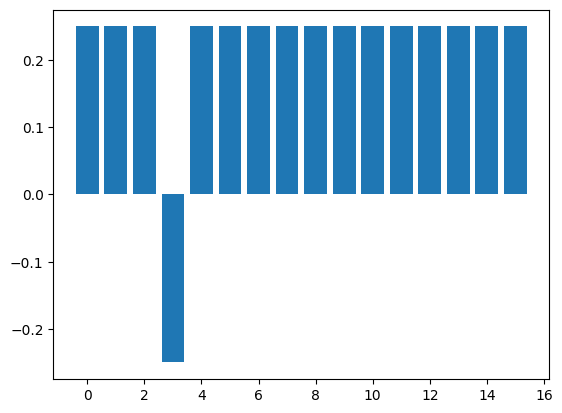

In [16]:
import pennylane as qml
import numpy as np 
import matplotlib.pyplot as plt

n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

def oracle_matrix(combo):
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution
    my_array = np.identity(2**len(combo)) # Create the identity matrix
    my_array[index, index] = -1
    return my_array

@qml.qnode(dev)
def oracle_amp(combo):
    for i in range(n_bits):
        qml.Hadamard(i)
        
    qml.QubitUnitary(oracle_matrix(combo), wires=list(range(n_bits)))

    return qml.state()

data = qml.QNode(oracle_amp, dev)([0,0,1,1])
data = [np.real(i) for i in data]
plt.bar(range(2**n_bits), data)
plt.show()




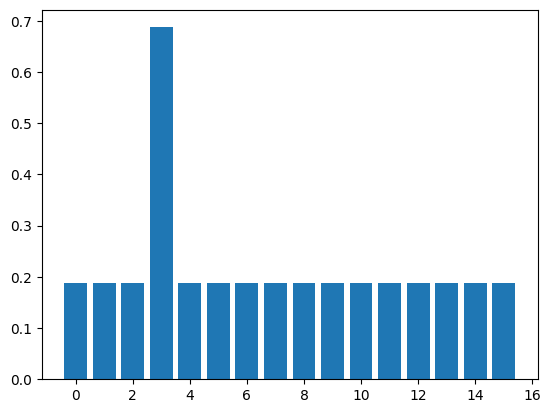

In [17]:
n_bits = 4

def diffusion_matrix():
    return 1/2**(n_bits-1)*np.ones((2**n_bits,2**n_bits))-np.eye(2**n_bits)

@qml.qnode(dev)
def difforacle_amp(combo):
    for i in range(n_bits):
        qml.Hadamard(i)
        
    qml.QubitUnitary(oracle_matrix(combo), wires=list(range(n_bits)))
    qml.QubitUnitary(diffusion_matrix(), wires=list(range(n_bits)))
    
    return qml.state()

data = qml.QNode(difforacle_amp, dev)([0,0,1,1])
data = [np.real(i) for i in data]
plt.bar(range(2**n_bits), data)
plt.show()

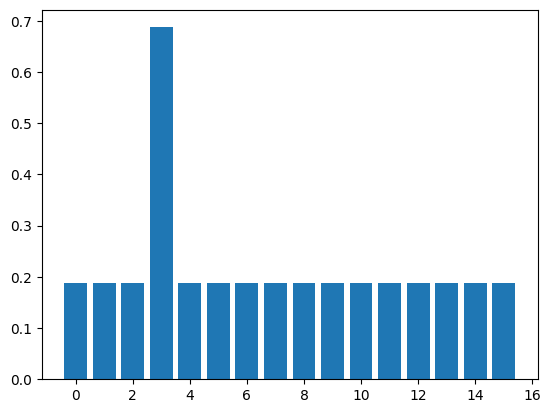

In [18]:
@qml.qnode(dev)
def two_difforacle_amp(combo):
    for i in range(n_bits):
        qml.Hadamard(i)
        
    qml.QubitUnitary(oracle_matrix(combo), wires=list(range(n_bits)))
    qml.QubitUnitary(diffusion_matrix(), wires=list(range(n_bits)))
    qml.QubitUnitary(oracle_matrix(combo), wires=list(range(n_bits)))
    qml.QubitUnitary(diffusion_matrix(), wires=list(range(n_bits)))
    qml.QubitUnitary(oracle_matrix(combo), wires=list(range(n_bits)))
    qml.QubitUnitary(diffusion_matrix(), wires=list(range(n_bits)))

    return qml.state()

data = qml.QNode(difforacle_amp, dev)([0,0,1,1])
data = [np.real(i) for i in data]
plt.bar(range(2**n_bits), data)
plt.show()